In [20]:
import pandas as pd
import tensorflow as tf

In [21]:
diabetes =pd.read_csv('./data/pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [22]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [23]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [24]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

In [25]:
#valores continuos
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [26]:
#valores categoricos
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

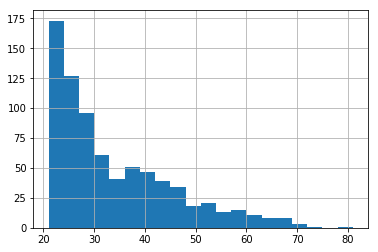

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

diabetes['Age'].hist(bins = 20)

In [29]:
#convertendo variavel continua em variavel categorica
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [30]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [34]:
#separando dados de teste e treino

x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [35]:
labels = diabetes['Class']

In [36]:
from sklearn.model_selection import  train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3,random_state=101)

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y = y_train, batch_size = 10, num_epochs=1000, shuffle=True)

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/tmp/tmp9f0yo736', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_model_dir': '/tmp/tmp9f0yo736', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


In [40]:
model.train(input_fn = input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9f0yo736/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9f0yo736/model.ckpt.


INFO:tensorflow:loss = 6.93147, step = 1


INFO:tensorflow:loss = 6.93147, step = 1


INFO:tensorflow:global_step/sec: 154.838


INFO:tensorflow:global_step/sec: 154.838


INFO:tensorflow:loss = 5.59509, step = 101 (0.647 sec)


INFO:tensorflow:loss = 5.59509, step = 101 (0.647 sec)


INFO:tensorflow:global_step/sec: 177.673


INFO:tensorflow:global_step/sec: 177.673


INFO:tensorflow:loss = 7.4012, step = 201 (0.563 sec)


INFO:tensorflow:loss = 7.4012, step = 201 (0.563 sec)


INFO:tensorflow:global_step/sec: 133.581


INFO:tensorflow:global_step/sec: 133.581


INFO:tensorflow:loss = 3.09848, step = 301 (0.752 sec)


INFO:tensorflow:loss = 3.09848, step = 301 (0.752 sec)


INFO:tensorflow:global_step/sec: 102.474


INFO:tensorflow:global_step/sec: 102.474


INFO:tensorflow:loss = 3.72715, step = 401 (0.977 sec)


INFO:tensorflow:loss = 3.72715, step = 401 (0.977 sec)


INFO:tensorflow:global_step/sec: 178.021


INFO:tensorflow:global_step/sec: 178.021


INFO:tensorflow:loss = 5.39925, step = 501 (0.556 sec)


INFO:tensorflow:loss = 5.39925, step = 501 (0.556 sec)


INFO:tensorflow:global_step/sec: 192.884


INFO:tensorflow:global_step/sec: 192.884


INFO:tensorflow:loss = 5.82738, step = 601 (0.519 sec)


INFO:tensorflow:loss = 5.82738, step = 601 (0.519 sec)


INFO:tensorflow:global_step/sec: 170.646


INFO:tensorflow:global_step/sec: 170.646


INFO:tensorflow:loss = 3.57151, step = 701 (0.586 sec)


INFO:tensorflow:loss = 3.57151, step = 701 (0.586 sec)


INFO:tensorflow:global_step/sec: 117.859


INFO:tensorflow:global_step/sec: 117.859


INFO:tensorflow:loss = 5.3546, step = 801 (0.848 sec)


INFO:tensorflow:loss = 5.3546, step = 801 (0.848 sec)


INFO:tensorflow:global_step/sec: 144.305


INFO:tensorflow:global_step/sec: 144.305


INFO:tensorflow:loss = 6.32294, step = 901 (0.697 sec)


INFO:tensorflow:loss = 6.32294, step = 901 (0.697 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmp9f0yo736/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmp9f0yo736/model.ckpt.


INFO:tensorflow:Loss for final step: 4.79872.


INFO:tensorflow:Loss for final step: 4.79872.


In [41]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [42]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-12-20:17:17


INFO:tensorflow:Starting evaluation at 2018-02-12-20:17:17


INFO:tensorflow:Restoring parameters from /tmp/tmp9f0yo736/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp9f0yo736/model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2018-02-12-20:17:17


INFO:tensorflow:Finished evaluation at 2018-02-12-20:17:17


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.806626, auc_precision_recall = 0.653802, average_loss = 0.529168, global_step = 1000, label/mean = 0.350649, loss = 5.09324, prediction/mean = 0.407441


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.806626, auc_precision_recall = 0.653802, average_loss = 0.529168, global_step = 1000, label/mean = 0.350649, loss = 5.09324, prediction/mean = 0.407441


In [43]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80662555,
 'auc_precision_recall': 0.65380234,
 'average_loss': 0.52916801,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0932422,
 'prediction/mean': 0.4074409}

In [44]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [45]:
predictions = model.predict(pred_input_func)

In [47]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Restoring parameters from /tmp/tmp9f0yo736/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp9f0yo736/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.59361225], dtype=float32),
  'logits': array([ 0.37891853], dtype=float32),
  'probabilities': array([ 0.40638775,  0.59361225], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.68418461], dtype=float32),
  'logits': array([ 0.77306974], dtype=float32),
  'probabilities': array([ 0.31581545,  0.68418461], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.4214204], dtype=float32),
  'logits': array([-0.31694531], dtype=float32),
  'probabilities': array([ 0.5785796 ,  0.42142037], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.39936155], dtype=float32),
  'logits': array([-0.40812594], dtype=float32),
  'probabilities': array([ 0.60063845,  0.39936158], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [48]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], features_clolumns=feat_cols, n_classes=2)

TypeError: __init__() got an unexpected keyword argument 'features_clolumns'